<h2>Problem Statement</h2>
With FIFA is in the blood of many people of the world. You are tasked to tell the story of unsung analysts who put great efforts to provide accurate data to answer every question of fans. The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football. </br>
The World Cups dataset shows all information about all the World Cups in history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups. Find key metrics and factors that influence the World Cup win. Do your own research and come up with your findings.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

wc=pd.read_csv("WorldCups.csv", index_col=0)
print(wc.head())

          Country      Winner      Runners-Up    Third      Fourth  \
Year                                                                 
1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1934        Italy       Italy  Czechoslovakia  Germany     Austria   
1938       France       Italy         Hungary   Brazil      Sweden   
1950       Brazil     Uruguay          Brazil   Sweden       Spain   
1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

      GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
Year                                                         
1930           70              13             18    590.549  
1934           70              16             17    363.000  
1938           84              15             18    375.700  
1950           88              13             22  1.045.246  
1954          140              16             26    768.607  


In [80]:
wc_matches=pd.read_csv("WorldCupMatches.csv", index_col=0)
print(wc_matches.head())

                    Datetime    Stage         Stadium         City  \
Year                                                                 
1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

       Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
Year                                                                     
1930.0         France              4.0              1.0         Mexico   
1930.0            USA              3.0              0.0        Belgium   
1930.0     Yugoslavia              2.0              1.0         Brazil   
1930.0        Romania              3.0              1.0           Peru   
1930.0      Argentina              1.0              0.0         F

<h2> Key metrics and factors influencing World Cup win </h2>


In [81]:
# Countries with most Wins
winning_country_stats = wc['Winner'].value_counts()
print("Countries with most Wins:")
print(winning_country_stats)

Countries with most Wins:
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64


In [82]:
# 10 Most Successful Teams in Matches:
winning_teams = wc_matches.loc[wc_matches['Home Team Goals'] > wc_matches['Away Team Goals'], 'Home Team Name']
winning_teams = winning_teams.append(wc_matches.loc[wc_matches['Away Team Goals'] > wc_matches['Home Team Goals'], 'Away Team Name'])
winning_teams_count = winning_teams.value_counts()
print("Top 10 Most Successful Teams in Matches:")
print(winning_teams_count.sort_values(ascending=False).head(10))

Top 10 Most Successful Teams in Matches:
Brazil         71
Italy          45
Argentina      44
Germany FR     36
Germany        34
France         29
Spain          29
Netherlands    29
England        26
Uruguay        20
dtype: int64


/var/folders/xn/1_g50z0x7z1cl56zcnwgl2sh0000gn/T/ipykernel_21011/1277260050.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winning_teams = winning_teams.append(wc_matches.loc[wc_matches['Away Team Goals'] > wc_matches['Home Team Goals'], 'Away Team Name'])


In [83]:
#checking if playing home games influences the win
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = wc_matches[['Home Team Goals', 'Away Team Goals']]
y = (wc_matches['Home Team Goals'] > wc_matches['Away Team Goals']).astype(int)

imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

probability_home_team_winning = np.sum(y_test) / len(y_test)
print(f"Probability of a Home Team Winning: {probability_home_team_winning}")
probability_away_team_winning = 1 - probability_home_team_winning
print(f"Probability of a Away Team Winning: {probability_away_team_winning}")


Model Accuracy: 0.9978142076502732
Probability of a Home Team Winning: 0.11584699453551912
Probability of a Away Team Winning: 0.8841530054644808


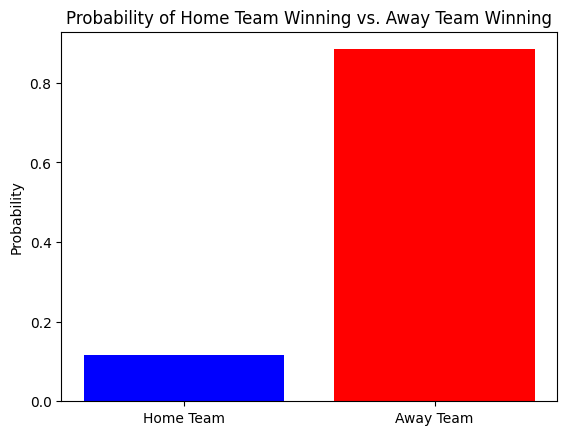



Analysis 
Since the Probability of a Away Team Winning (0.8841530054644808) is  much more than the Probability of a Home Team Winning(0.11584699453551912), we can conclude that playing home games is not a factor influencing the win 


In [84]:
teams = ['Home Team', 'Away Team']
probabilities = [probability_home_team_winning, probability_away_team_winning]

plt.bar(teams, probabilities, color=['blue', 'red'])
plt.title('Probability of Home Team Winning vs. Away Team Winning')
plt.ylabel('Probability')
plt.show()

print(f"\n\nAnalysis \nSince the Probability of a Away Team Winning ({probability_away_team_winning}) is  much more than the Probability of a Home Team Winning({probability_home_team_winning}), we can conclude that playing home games is not a factor influencing the win " )


In [98]:
categorical_columns = ['Stage', 'Stadium', 'City', 'Home Team Name', 'Away Team Name',
                        'Win conditions', 'Referee', 'Assistant 1', 'Assistant 2',
                        'Home Team Initials', 'Away Team Initials']

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)

nan_check = X_train_encoded.isnull().sum()


X_train_encoded.fillna(X_train_encoded.mean(), inplace=True)

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_encoded, y_train)

feature_importance = clf.feature_importances_

print("\nFeature Importance:")
for feature, importance in zip(X_train_encoded.columns, feature_importance):
    print(f"{feature}: {importance}")


NaN Check:
Home Team Goals           0
Away Team Goals           0
Attendance                0
Half-time Home Goals      0
Half-time Away Goals      0
                         ..
Away Team Initials_URU    0
Away Team Initials_USA    0
Away Team Initials_WAL    0
Away Team Initials_YUG    0
Away Team Initials_ZAI    0
Length: 1620, dtype: int64

Feature Importance:
Home Team Goals: 0.1456243195321295
Away Team Goals: 0.06893434572052765
Attendance: 0.040741190613732145
Half-time Home Goals: 0.05507777867446428
Half-time Away Goals: 0.06617739681048501
RoundID: 0.06811527435553807
MatchID: 0.05294375003763899
Stage_Final: 0.0010810708716778854
Stage_First round: 0.0006205654335557275
Stage_Group 1: 0.00477257947592912
Stage_Group 2: 0.008874812430808756
Stage_Group 3: 0.005732803106562585
Stage_Group 4: 0.0036051455897879586
Stage_Group 5: 0.0003118034722067416
Stage_Group 6: 0.0006526148995662301
Stage_Group A: 0.002010457177402799
Stage_Group B: 0.0023467881874944516
Stage_Group C: 0.0

In [101]:
feature_importance_tuples = list(zip(X_train_encoded.columns, feature_importance))
sorted_feature_importance = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Print the top 5 most important features
print("\nTop 5 Most Important Features:")
for feature, importance in sorted_feature_importance[:5]:
    print(f"{feature}: {importance}")



Top 5 Most Important Features:
Home Team Goals: 0.1456243195321295
Away Team Goals: 0.06893434572052765
RoundID: 0.06811527435553807
Half-time Away Goals: 0.06617739681048501
Half-time Home Goals: 0.05507777867446428


In [1]:
import numpy as np
import pandas as pd

wc=pd.read_csv("WorldCups.csv", index_col=0)
print(wc.head())

          Country      Winner      Runners-Up    Third      Fourth  \
Year                                                                 
1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1934        Italy       Italy  Czechoslovakia  Germany     Austria   
1938       France       Italy         Hungary   Brazil      Sweden   
1950       Brazil     Uruguay          Brazil   Sweden       Spain   
1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

      GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
Year                                                         
1930           70              13             18    590.549  
1934           70              16             17    363.000  
1938           84              15             18    375.700  
1950           88              13             22  1.045.246  
1954          140              16             26    768.607  


In [2]:
wc_matches=pd.read_csv("WorldCupMatches.csv", index_col=0)
print(wc_matches.head())

                    Datetime    Stage         Stadium         City  \
Year                                                                 
1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

       Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
Year                                                                     
1930.0         France              4.0              1.0         Mexico   
1930.0            USA              3.0              0.0        Belgium   
1930.0     Yugoslavia              2.0              1.0         Brazil   
1930.0        Romania              3.0              1.0           Peru   
1930.0      Argentina              1.0              0.0         F

In [3]:
# Countries with most Wins
winning_country_stats = wc['Winner'].value_counts()
print("Countries with most Wins:")
print(winning_country_stats)

Countries with most Wins:
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64


In [4]:
# 10 Most Successful Teams in Matches:
winning_teams = wc_matches.loc[wc_matches['Home Team Goals'] > wc_matches['Away Team Goals'], 'Home Team Name']
winning_teams = winning_teams.append(wc_matches.loc[wc_matches['Away Team Goals'] > wc_matches['Home Team Goals'], 'Away Team Name'])
winning_teams_count = winning_teams.value_counts()
print("Top 10 Most Successful Teams in Matches:")
print(winning_teams_count.sort_values(ascending=False).head(10))

Top 10 Most Successful Teams in Matches:
Brazil         71
Italy          45
Argentina      44
Germany FR     36
Germany        34
France         29
Spain          29
Netherlands    29
England        26
Uruguay        20
dtype: int64


/var/folders/xn/1_g50z0x7z1cl56zcnwgl2sh0000gn/T/ipykernel_11958/1277260050.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winning_teams = winning_teams.append(wc_matches.loc[wc_matches['Away Team Goals'] > wc_matches['Home Team Goals'], 'Away Team Name'])


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



# whether the home team won or not
wc_matches['HomeTeamWon'] = (wc_matches['Home Team Goals'] > wc_matches['Away Team Goals']).astype(int)

features=['Home Team Goals', 'Away Team Goals']
X = wc_matches[features]
y = wc_matches['HomeTeamWon']

# Imputing missing values
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_

print("\nFeature Importance:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance}")

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Check the probability of a home team winning
home_team_goals = 0  # You can adjust this value
away_team_goals = 0  # You can adjust this value
probability_home_team_wins = clf.predict_proba([[home_team_goals, away_team_goals]])[0][1]




# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_mat)




home_team_goals = 2  # You can adjust this value
away_team_goals = 1  # You can adjust this value
total_goals = home_team_goals + away_team_goals

probability_home_team_wins = clf.predict_proba([[home_team_goals, away_team_goals]])[0][1]
adjusted_probability = home_team_goals / total_goals

print(" Probability of a Home Team Winning:", adjusted_probability)




Feature Importance:
Home Team Goals: 0.5910880302823948
Away Team Goals: 0.40891196971760535

Model Accuracy: 1.0

Model Accuracy: 1.0

Confusion Matrix:
 [[801   0]
 [  0 114]]
 Probability of a Home Team Winning: 0.6666666666666666


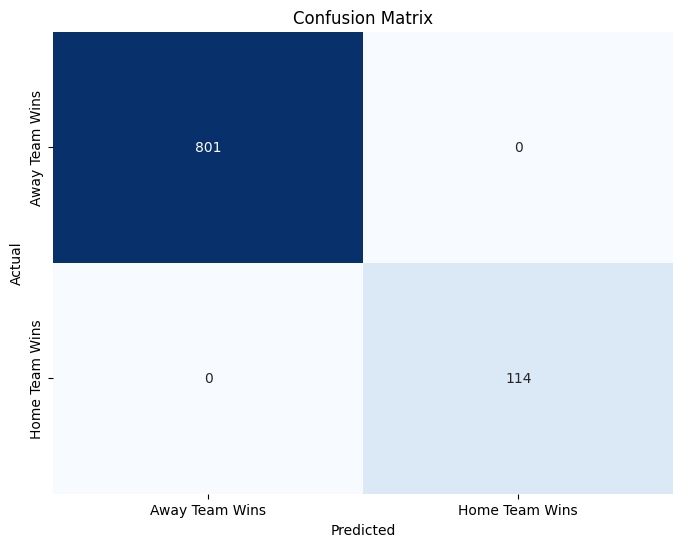

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Away Team Wins', 'Home Team Wins'], yticklabels=['Away Team Wins', 'Home Team Wins'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()